## Assignment 9 - Choose your own adventure

For this assignment, you will wrangle your own data to show some meaningful visualizations of a feature that will be of interest to your particular topic of analysis. From the list of available choices below, **you will choose TWO visualizations to create from your own corpus data, one from the "A" group and one from the "B" group.** Note that some visualizations in the B group may be combined in a single plot (e.g., stacked bar plot), or may require multiple plots or "side by side" plots. 

Every project group is analyzing at least one of: *harmony, melody, and/or rhythm*, so it should not be hard to find something from the lists below to suit your needs. (However, if you would like to propose an alternative, you must approve it with me first.)

Note: some of you have a between-groups design and others of you are still looking at 'groups' but in this case the groups have a linear relationship (e.g., epochs over time). In that case, be sure to make any plots or visualizations with the groups appropriately ordered.


## A group: basic distributions and categorizations



* Distribution of melodic intervals between/across groups (may be directed or undirected as relevant, usually best to collapse to simple from compound)


* Comparison of melodic interval ranges in semitones including means and standard deviations (e.g., boxplots or whisker plots) between/across groups


* Comparison of the distribution of harmonic intervals between/across groups


* Comparison/categorization of consonant to dissonant harmonic intervals between/across groups


* Distribution of rhythmic values (durations), or inter-onset intervals (if you don't have durations) between/across groups


* Distribution of beats or beat onsets (or onsets relative to measure in music21) between/across groups


* Distribution of harmonies used (with vocabulary reduced as appropriate for your dataset) between/across groups






## B group pairwise comparisons, sequential relations, or more complex grouping
bigrams = antecedent to consequent pairs using a sliding window (like humdrum "context") <br/>
If you have groups or are making comparisons over time or epochs, most of these could be performed similarly.

* Comparison of interval bigrams 


* Comparison of contour bigrams


* Comparison of harmonic bigrams


* Comparison of IOI or duration bigrams (either differences or absolutes?)


* Comparison of consonant or dissonant intervals on strong versus weak beats (across groups)


* Average number of X per measure (this may be a proxy for something like 'complexity'). E.g., average # of duration changes (or unique duration types) per measure; avg # of chords per measure; avg intervallic range per measure. [Note this could also be per *something else* like the piece level; e.g., average # of time signature changes per piece]


* Classification of X along some variable Y (across groups if relevant) (E.g., proportion of root versus first inversion versus second inversion triads as a function of the beat strength or chord offset); 


In [59]:
from music21 import *
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

In [60]:
# Get the analytic dataset into a pandas dataframe
dataset = pd.read_csv('analyticDataset.csv')
dataset.columns
#dataset['file']

/storage/home/hpaceice1/shared-classes/envs/musi4843/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (3,7,12,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['Unnamed: 0', 'Chord', 'Composer', 'File', 'Measure Beat',
       'Measure Beat Number', 'Measure Beat Number.1', 'Measure Count',
       'Measure Number', 'Measure Number.1', 'MeasureCount', 'MeasureNumber',
       'Normal Form', 'NormalForm', 'Offset', 'PCsInNormalForm',
       'PCsinNormalForm', 'Phrase Boundary', 'PhraseBoundary', 'Song Count',
       'beatNumber', 'file', 'measureNumber', 'offset', 'Unnamed: 0.1',
       'pieceName', 'movementName', 'genre', 'publicationYear', 'Epoch',
       'Source', 'fileFormat', 'phraseAnalysis', 'fileConversion',
       'getChords'],
      dtype='object')

In [61]:
# Create a new dataframe that's just the chords and offsets
chord_df = dataset[['Chord', 'offset', 'file']].copy().dropna()
chord_df

,Chord,offset,file
0,<music21.chord.Chord E3>,0.000,AlariodelRio_Sol_Sostenido.xml
1,<music21.chord.Chord A#3>,0.500,AlariodelRio_Sol_Sostenido.xml
2,<music21.chord.Chord G#3>,1.000,AlariodelRio_Sol_Sostenido.xml
3,<music21.chord.Chord D#3>,1.500,AlariodelRio_Sol_Sostenido.xml
4,<music21.chord.Chord A#3>,2.000,AlariodelRio_Sol_Sostenido.xml
...,...,...,...
31150,<music21.chord.Chord A-2>,365.875,Zhang_Mazurka.xml
31151,<music21.chord.Chord D-2>,366.000,Zhang_Mazurka.xml
31152,<music21.chord.Chord G-1 G-2 A2 C#3 E3 B--3 D-...,368.000,Zhang_Mazurka.xml
31153,<music21.chord.Chord D-1 D-2 F4 A-4 F5>,370.000,Zhang_Mazurka.xml


In [62]:
# Convert string in YCAC dataset back to chord object
def strToChord(chord_str):
    patt = '\<music21\.chord\.Chord ([^>]*)>'
    notes = re.findall(patt, chord_str)
    newChord = chord.Chord(notes[0].split())
    return newChord

In [63]:
def commonName(chrd):
    return chrd.commonName

In [65]:
# Offset integer Boolean mask
mask = chord_df['offset'].apply(lambda x: x.is_integer())
chord_df[mask]
chord_df
mask

0         True
1        False
2         True
3        False
4         True
         ...  
31150    False
31151     True
31152     True
31153     True
31154     True
Name: offset, Length: 27927, dtype: bool

In [58]:
chord_df['Chord'] = chord_df['Chord'].apply(strToChord)
chord_df['Common Names'] = chord_df['Chord'].apply(commonName)

In [43]:
chord_df['Common Names'].value_counts()

unison                               7209
major triad                          2050
minor triad                          1420
incomplete dominant-seventh chord     816
Perfect Fifth                         710
                                     ... 
Augmented 40th                          1
alternating pentachord                  1
Augmented 39th                          1
augmented-eleventh                      1
dorian hexachord                        1
Name: Common Names, Length: 246, dtype: int64

In [44]:
chord_df.columns = ['Chord', 'offset', 'File', 'intOffset', 'Common Names']
chord_df

,Chord,offset,File,intOffset,Common Names
0,[<music21.note.Note E>],0.000,AlariodelRio_Sol_Sostenido.xml,True,unison
1,[<music21.note.Note A#>],0.500,AlariodelRio_Sol_Sostenido.xml,False,unison
2,[<music21.note.Note G#>],1.000,AlariodelRio_Sol_Sostenido.xml,True,unison
3,[<music21.note.Note D#>],1.500,AlariodelRio_Sol_Sostenido.xml,False,unison
4,[<music21.note.Note A#>],2.000,AlariodelRio_Sol_Sostenido.xml,True,unison
...,...,...,...,...,...
31150,[<music21.note.Note A->],365.875,Zhang_Mazurka.xml,False,unison
31151,[<music21.note.Note D->],366.000,Zhang_Mazurka.xml,True,unison
31152,"[<music21.note.Note G->, <music21.note.Note G-...",368.000,Zhang_Mazurka.xml,True,minor seventh chord
31153,"[<music21.note.Note D->, <music21.note.Note D-...",370.000,Zhang_Mazurka.xml,True,major triad


In [17]:
chord_df['File'].value_counts()

Beatty_Musing_for_Piano.xml                                 3409
Rhapsody 79 2 G minor.mid                                   2868
Pianoflage in C major.mid                                   1942
Six Bagatelles IV Rondo Op107 Bb Major.mid                  1680
Con moto D850 II A Major.mid                                1673
Rautavaara_Etude_op42_no1_Thirds.mxl                        1577
6 Etudes for Piano Op 111 Prelude and Fugue Eb minor.mid    1332
Prelude in C#- Op3No2 C#-.mid                               1285
Zhang_Mazurka.xml                                           1122
Nocturne 55 1 F Minor.mid                                   1055
Simpson_Invention_no6.xml                                    966
Seven Preludes Op17No5 F minor.mid                           840
Lighting the Tree S186 F Major.mid                           661
Album for Children 4 Cumpleanos E major.mid                  659
AlariodelRio_Sol_Sostenido.xml                               613
Songs without Words Op102

In [45]:
def stringify(x):
    return x.strip()

In [46]:
workList = pd.read_csv('workList.csv').dropna()

In [47]:
workList['File'] = workList['File'].apply(stringify)

In [48]:
# Get all of the chord and piece information into a single data frame.
full_chord_Info=pd.merge(chord_df,workList,how='outer',on='File')

In [49]:
full_chord_Info

,Chord,offset,File,intOffset,Common Names,Unnamed: 0,pieceName,movementName,genre,Composer,publicationYear,Epoch,Source,fileFormat,phraseAnalysis,fileConversion,getChords
0,[<music21.note.Note E>],0.000,AlariodelRio_Sol_Sostenido.xml,True,unison,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020,IMSLP,PDF,N,Y,Y
1,[<music21.note.Note A#>],0.500,AlariodelRio_Sol_Sostenido.xml,False,unison,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020,IMSLP,PDF,N,Y,Y
2,[<music21.note.Note G#>],1.000,AlariodelRio_Sol_Sostenido.xml,True,unison,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020,IMSLP,PDF,N,Y,Y
3,[<music21.note.Note D#>],1.500,AlariodelRio_Sol_Sostenido.xml,False,unison,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020,IMSLP,PDF,N,Y,Y
4,[<music21.note.Note A#>],2.000,AlariodelRio_Sol_Sostenido.xml,True,unison,piece36,Piano Piece No8,Op7 No2,OtherSolo,AlariodelRio,2013.0,1970-2020,IMSLP,PDF,N,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27922,[<music21.note.Note A->],365.875,Zhang_Mazurka.xml,False,unison,piece32,24 Etudes,No15 Mazurka with Chinese Trio,Etude,Zhang,2015.0,1970-2020,IMSLP,PDF,N,Y,Y
27923,[<music21.note.Note D->],366.000,Zhang_Mazurka.xml,True,unison,piece32,24 Etudes,No15 Mazurka with Chinese Trio,Etude,Zhang,2015.0,1970-2020,IMSLP,PDF,N,Y,Y
27924,"[<music21.note.Note G->, <music21.note.Note G-...",368.000,Zhang_Mazurka.xml,True,minor seventh chord,piece32,24 Etudes,No15 Mazurka with Chinese Trio,Etude,Zhang,2015.0,1970-2020,IMSLP,PDF,N,Y,Y
27925,"[<music21.note.Note D->, <music21.note.Note D-...",370.000,Zhang_Mazurka.xml,True,major triad,piece32,24 Etudes,No15 Mazurka with Chinese Trio,Etude,Zhang,2015.0,1970-2020,IMSLP,PDF,N,Y,Y


In [50]:
raw_chordName_data = full_chord_Info['Common Names'].value_counts()

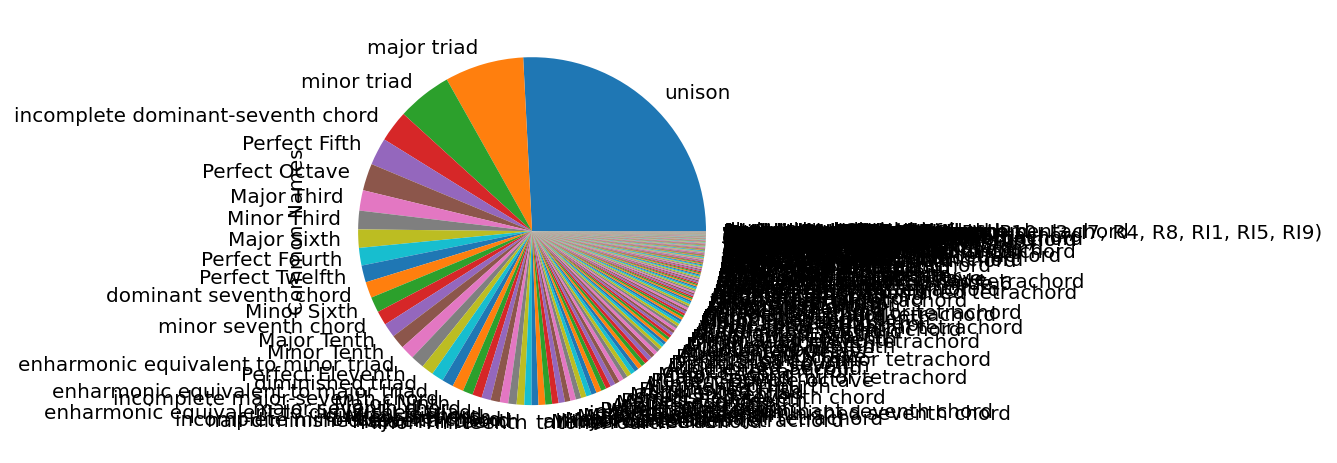

In [51]:
# Plot distribution of chord types
piePlot = raw_chordName_data.plot(kind='pie')

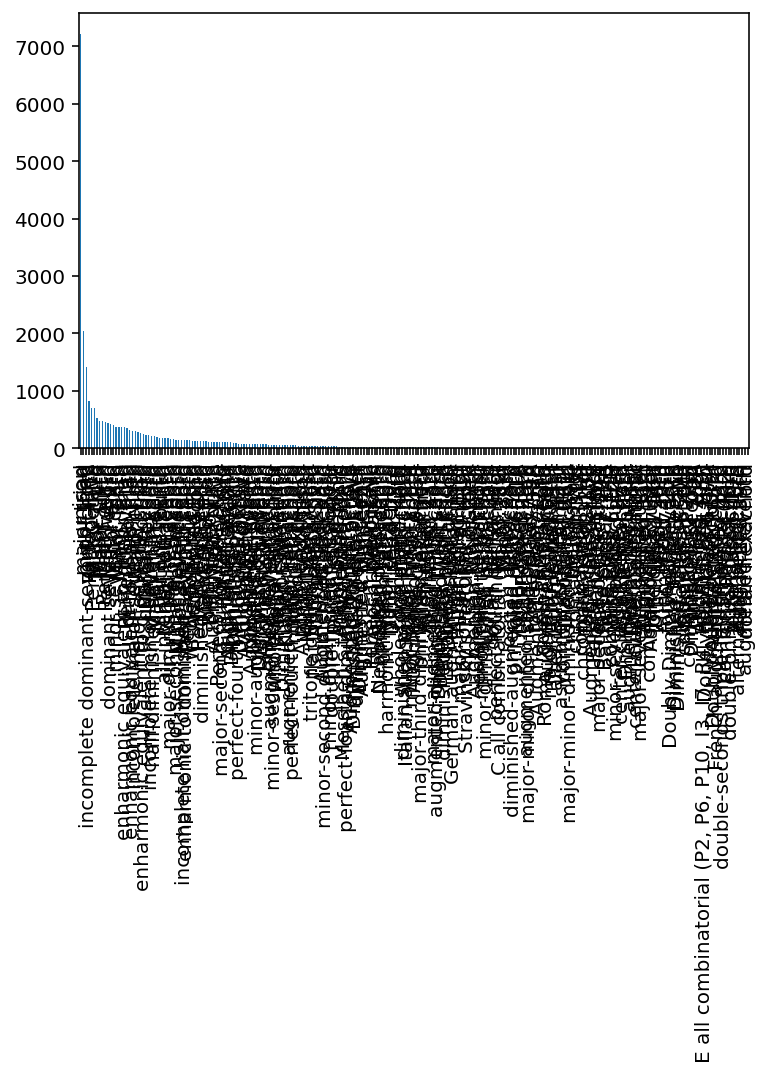

In [31]:
barPlot = raw_chordName_data.plot(kind='bar')